In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [93]:
df = pd.read_excel('C:/Users/BRISTY/Downloads/E Commerce Dataset.xlsx',sheet_name = 'E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [94]:
dt = df.copy()

In [95]:

df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [96]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [97]:
df.drop(['CustomerID'],axis=1, inplace=True)


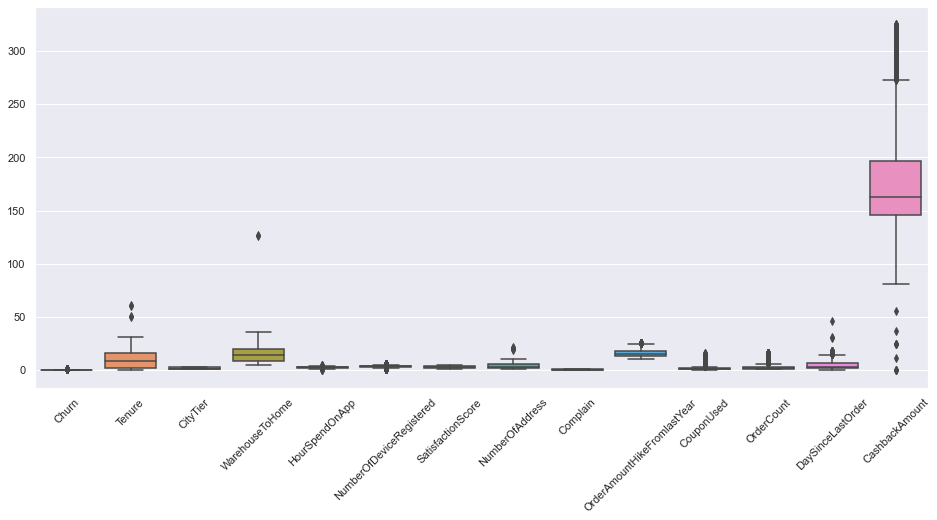

In [98]:
    sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(16,7))
    sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [99]:
cat = df.select_dtypes(include='object').columns #object type columns
num = list(df.select_dtypes(exclude='object').columns) #numerical type columns
num.remove('Churn')
for cols in num:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    df[cols] = df[cols].mask(df[cols]<lr, lr, )
    df[cols] = df[cols].mask(df[cols]>ur, ur, )

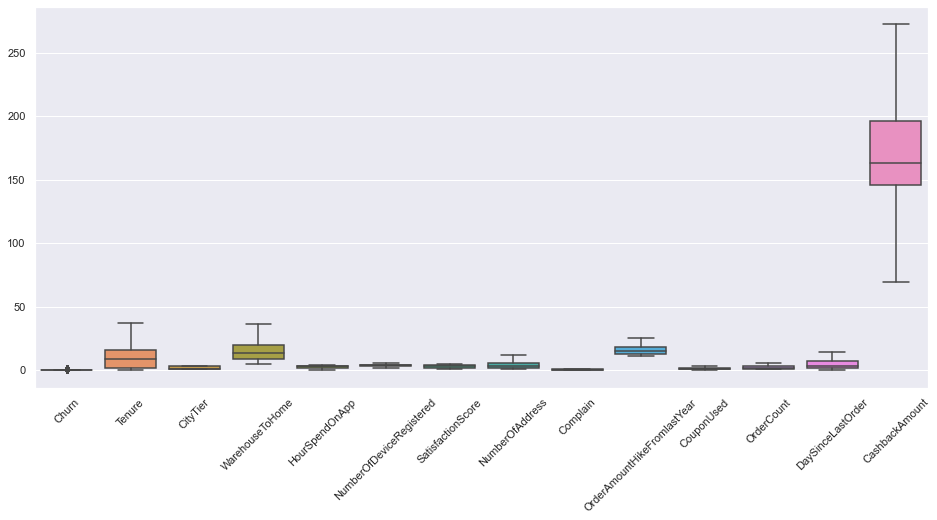

In [100]:
sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [101]:
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [102]:
df['Tenure'].fillna(df.Tenure.median(), inplace=True)
df['WarehouseToHome'].fillna(df.WarehouseToHome.median(), inplace=True)
df['HourSpendOnApp'].fillna(df.HourSpendOnApp.median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(round(df.OrderAmountHikeFromlastYear.mean()), inplace=True)
df['CouponUsed'].fillna(df.CouponUsed.median(), inplace=True)
df['OrderCount'].fillna(df.OrderCount.median(), inplace=True)
df['DaySinceLastOrder'].fillna(df.DaySinceLastOrder.median(), inplace=True)

In [103]:
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [104]:
for col in cat:
    print(df[col].value_counts())

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
Male      3384
Female    2246
Name: Gender, dtype: int64
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64


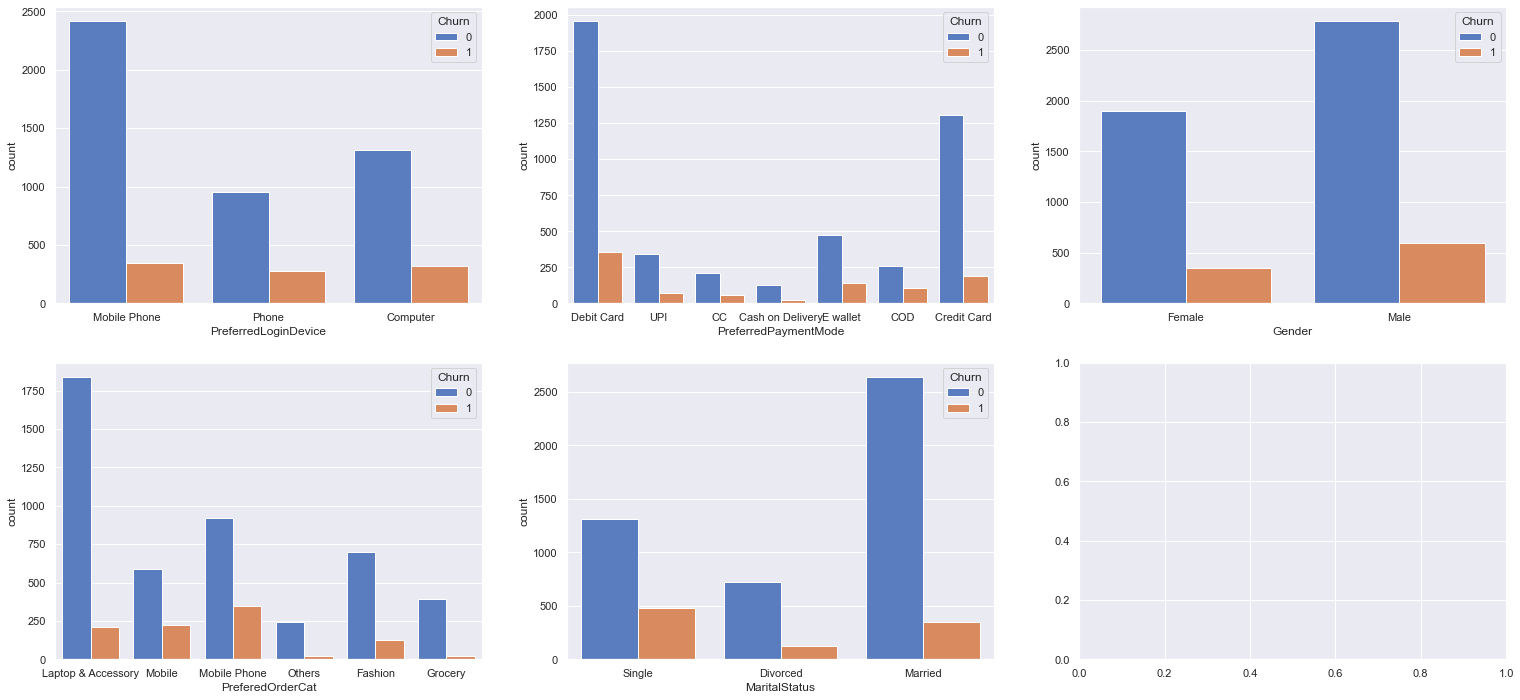

In [106]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(26,12))
for col,subplot in zip(cat, ax.flatten()):
 sns.countplot(x = df[col], hue=df.Churn, ax=subplot)

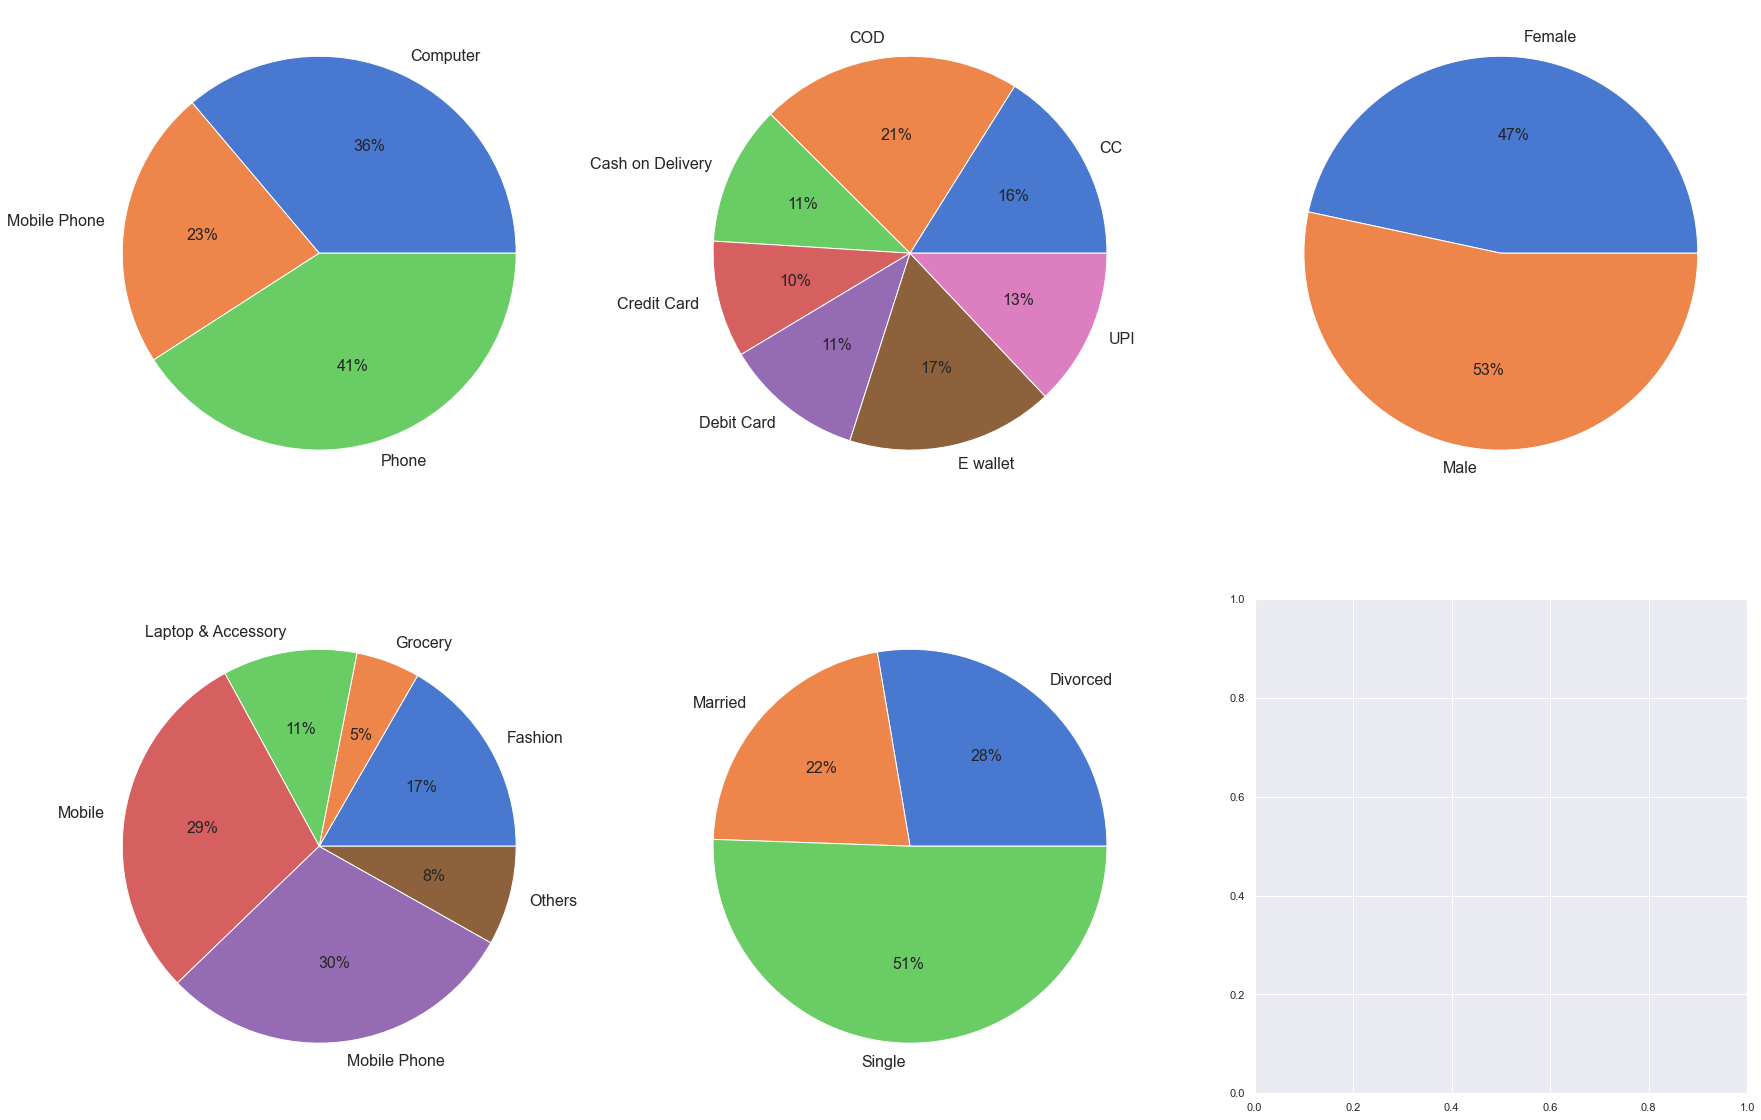

In [107]:
fig, ax = plt.subplots(2, 3, figsize=(30, 20))
plt.rcParams['font.size'] = '16'
for col,subplot in zip(cat, ax.flatten()):
    #calculate percent churn 
    temp = df.groupby(by=df[col]).Churn.sum()
    total = df.value_counts(col).sort_index()
    res1 = temp/total*100
    #visualising the result
    subplot.pie(labels = res1.index, x = res1.values, autopct='%.0f%%',textprops={'fontsize': 16})

In [109]:
for i, subplot in zip(num, ax.flatten()):
    sns.histplot(df[i], kde = True, ax=subplot)

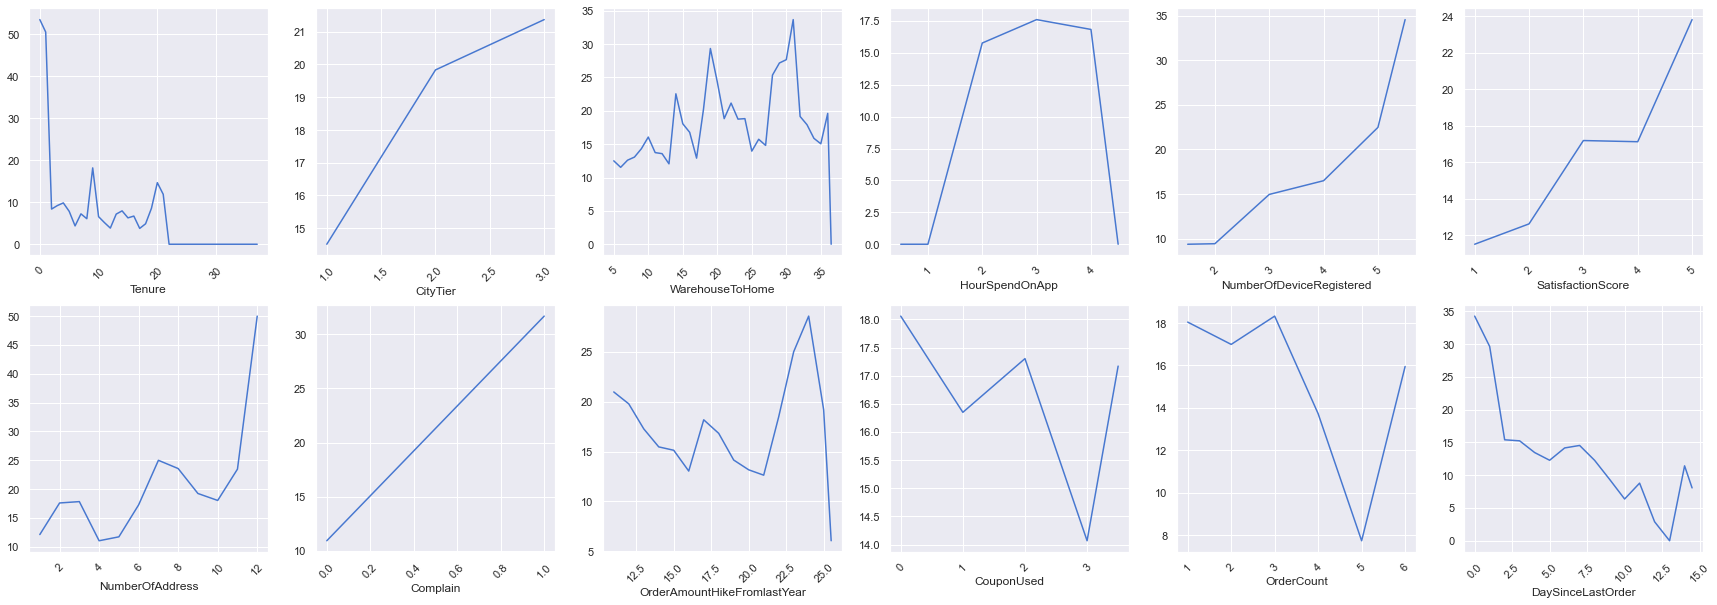

In [110]:
fig, ax = plt.subplots(2, 6, figsize=(30, 10))
for col,subplot in zip(num, ax.flatten()):
    temp = df.groupby(by=df[col]).Churn.sum()
    total = df.value_counts(col).sort_index()
    res1 = temp/total*100
    sns.lineplot(x = res1.index, y = res1.values, ax=subplot, )
    subplot.tick_params(axis='x',labelrotation=45)

<AxesSubplot:>

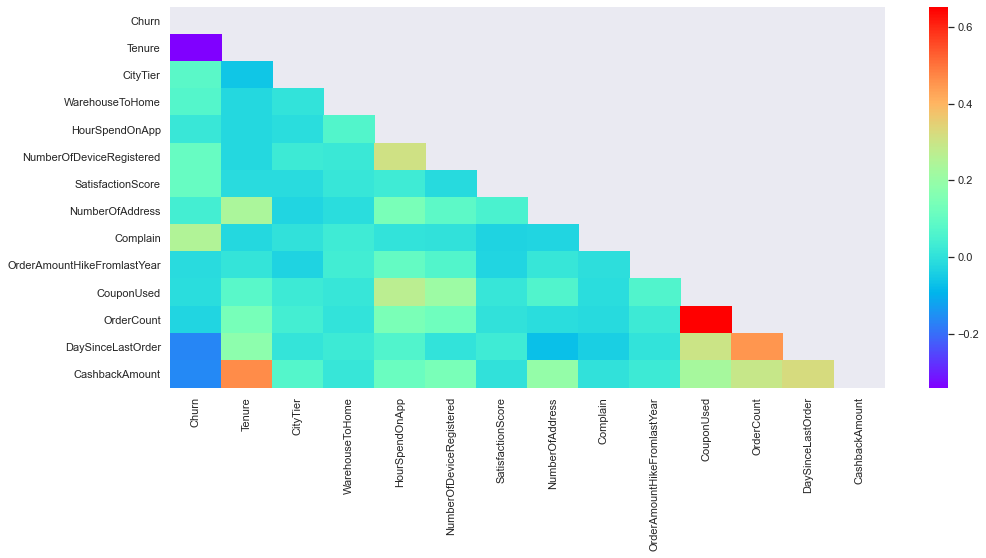

In [111]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots( figsize=(16, 7))
sns.heatmap(df.corr(method='pearson'), mask=mask, cmap='rainbow')

In [123]:
pip install XGBoost

Note: you may need to restart the kernel to use updated packages.


In [128]:
import xgboost as xgp

In [129]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [130]:
enc = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col]=enc.fit_transform(df[col])

In [131]:
X_train, X_test,y_train, y_test = train_test_split(df.drop('Churn', axis=1), df.Churn)

In [132]:
class my_classifier(BaseEstimator,):
    def __init__(self, estimator=None):
        self.estimator = estimator
    def fit(self, X, y=None):
        self.estimator.fit(X,y)
        return self
    def predict(self, X, y=None):
        return self.estimator.predict(X,y)
    def predict_proba(self, X):
        return self.estimator.predict_proba(X)
    def score(self, X, y):
        return self.estimator.score(X, y)

In [133]:
pipe = Pipeline([('scaler', StandardScaler()), ('clf', my_classifier())])

In [134]:
parameters = [
              {'clf':[LogisticRegression(max_iter=1000)],
               'clf__C':[0.001,0.01,.1,1],
               'clf__solver':['lbfgs','liblinear']
               },
             {'clf':[RandomForestClassifier()],
             'clf__criterion':['gini','entropy'], 
             },
             {
               'clf':[DecisionTreeClassifier()],
             'clf__criterion':['gini','entropy'],
             },
             {
              'clf':[XGBClassifier()],
             'clf__learning_rate':[0.01,0.1,0.2,0.3],
             'clf__reg_lambda':[0.01,0.1,1],
             'clf__reg_alpha': [0.01,0.1,0,1],
             }]


In [135]:
grid = GridSearchCV(pipe, parameters, cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', my_classifier())]),
             param_grid=[{'clf': [LogisticRegression(max_iter=1000)],
                          'clf__C': [0.001, 0.01, 0.1, 1],
                          'clf__solver': ['lbfgs', 'liblinear']},
                         {'clf': [RandomForestClassifier()],
                          'clf__criterion': ['gini', 'entropy']},
                         {'clf': [DecisionTreeClassifier()],
                          'clf__criterion': ['gini', 'e...
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=None, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                m

In [136]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.2, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=1,
                          

In [137]:
grid.best_score_

0.9568930704730922

In [138]:
y_pred = grid.predict(X_test,)

<AxesSubplot:>

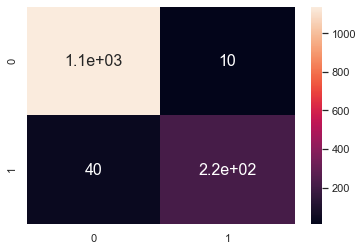

In [139]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [141]:
print(f1_score(y_test,y_pred))


0.8983739837398375


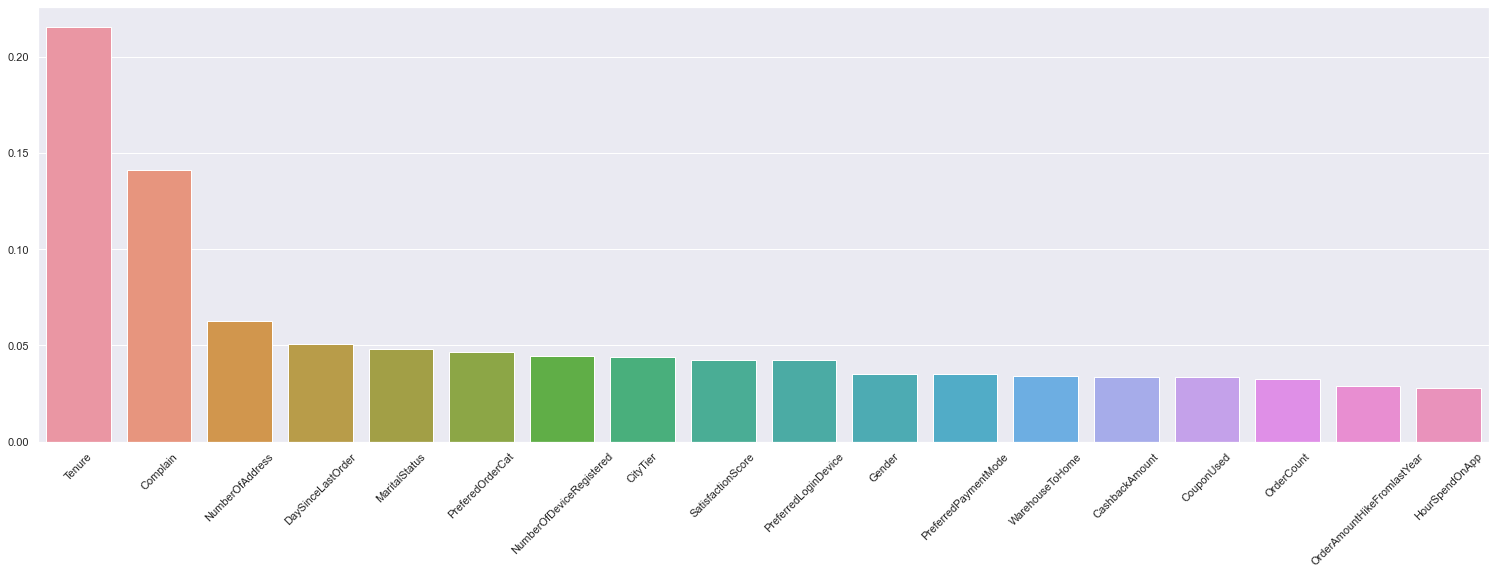

In [142]:
feature_array = grid.best_estimator_[-1].feature_importances_
importance = dict(zip(df.drop('Churn',axis=1).columns,feature_array))
importance = dict(sorted(importance.items(), key= lambda item:item[1],reverse = True) )
fig, ax = plt.subplots(figsize=(26,8))
sns.barplot(x=list(importance.keys()), y=list(importance.values()))
plt.tick_params(axis='x', labelrotation=45)
plt.show()